In [69]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [70]:
titanic = pd.read_csv('src/titanic.csv', index_col='PassengerId')#, sep=';', index_col='PassengerId')

In [71]:
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


# Идиома: расчет частоты события

- `.sum()` вектора из нулей и единиц = количество единиц
- `.mean()` вектора из нулей и единиц = доля единиц

In [72]:
titanic.Survived.mean()

0.3838383838383838

Какова частота выполнения условия?

In [73]:
(titanic.Age >= 18).mean()

0.6745230078563412

Сколько всего строк, удовлетворяющих условию?

In [74]:
(titanic.Age >= 18).sum()

601

# GroupBy

Как посчитать долю выживших в разных группах?

In [75]:
print('female\t', titanic.loc[titanic.Sex == 'female', 'Survived'].mean())
print('male\t', titanic.loc[titanic.Sex == 'male', 'Survived'].mean())

female	 0.7420382165605095
male	 0.18890814558058924


In [77]:
titanic.Parch.nunique()

7

[Split -> Apply -> Combine](http://pandas.pydata.org/pandas-docs/stable/groupby.html)

Аналогично `GROUP BY` в SQL:
```sql
SELECT Sex, AVG(Survived)
FROM titanic
GROUP BY Sex;
```

In [78]:
titanic.groupby('Sex').Survived.mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [79]:
titanic.groupby('Parch').Survived.mean()

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

## 1) Разбиение (Split)

GroupBy хранит исходный `DataFrame` (или `Series`) и разбиение на группы, т.е. соответствие "название группы (значение колонки, по которой группируем) – список индексов"

In [81]:
splits = titanic.groupby('Sex')
print(type(splits))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [82]:
splits

In [86]:
splits.groups['female']

Int64Index([  2,   3,   4,   9,  10,  11,  12,  15,  16,  19,
            ...
            867, 872, 875, 876, 880, 881, 883, 886, 888, 889],
           dtype='int64', name='PassengerId', length=314)

In [87]:
splits.get_group('female')  # тот же результат, что и titanic.loc[titanic.Sex == 'female']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...
881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q


Другие способы разбиения:

- по нескольким колонкам

In [25]:
titanic.groupby(['Sex', 'Pclass']).groups.keys()

dict_keys([('female', 1), ('female', 2), ('female', 3), ('male', 1), ('male', 2), ('male', 3)])

- по колонке, которой нет в исходном `DataFrame`

In [26]:
adult = (titanic.Age >= 18)
adult.loc[titanic.Age.isnull()] = np.nan

In [28]:
adult.value_counts(dropna=False)

1.0    601
NaN    177
0.0    113
Name: Age, dtype: int64

In [29]:
titanic.groupby(adult).groups.keys()

dict_keys([0.0, 1.0])

NB: группа, соответствующая значению `NaN`, не создается. Можно это обойти, предварительно заполнив `NaN` каким-нибудь специальным значением.

In [30]:
titanic.groupby(adult.fillna('NA')).groups.keys()

dict_keys([0.0, 1.0, 'NA'])

- по значению функции, рассчитанной по индексу

In [31]:
titanic.groupby(lambda s: s % 3).groups

{0: Int64Index([  3,   6,   9,  12,  15,  18,  21,  24,  27,  30,
             ...
             864, 867, 870, 873, 876, 879, 882, 885, 888, 891],
            dtype='int64', name='PassengerId', length=297),
 1: Int64Index([  1,   4,   7,  10,  13,  16,  19,  22,  25,  28,
             ...
             862, 865, 868, 871, 874, 877, 880, 883, 886, 889],
            dtype='int64', name='PassengerId', length=297),
 2: Int64Index([  2,   5,   8,  11,  14,  17,  20,  23,  26,  29,
             ...
             863, 866, 869, 872, 875, 878, 881, 884, 887, 890],
            dtype='int64', name='PassengerId', length=297)}

In [32]:
titanic.groupby(titanic.index % 3).groups  # то же самое

{0: Int64Index([  3,   6,   9,  12,  15,  18,  21,  24,  27,  30,
             ...
             864, 867, 870, 873, 876, 879, 882, 885, 888, 891],
            dtype='int64', name='PassengerId', length=297),
 1: Int64Index([  1,   4,   7,  10,  13,  16,  19,  22,  25,  28,
             ...
             862, 865, 868, 871, 874, 877, 880, 883, 886, 889],
            dtype='int64', name='PassengerId', length=297),
 2: Int64Index([  2,   5,   8,  11,  14,  17,  20,  23,  26,  29,
             ...
             863, 866, 869, 872, 875, 878, 881, 884, 887, 890],
            dtype='int64', name='PassengerId', length=297)}

NB: можно разбивать не только по строкам, но и по столбцам (`axis=1`)

## 2) Агрегация (Apply + Combine)

Обычные функции агрегации:

In [88]:
splits.count()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,
female,314,314,314,261,314,314,314,314,97,312
male,577,577,577,453,577,577,577,577,107,577


In [89]:
splits.nunique()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,
female,2,3,314,1,63,7,7,247,156,75,3
male,2,3,577,1,82,7,6,519,193,96,3


In [90]:
splits.mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,
female,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


Доступ к отдельному столбцу с тем же самым разбиением:

In [91]:
splits.Survived

In [92]:
splits.Survived.mean()  # быстрее, чем spilts.mean().Survived

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [93]:
splits.Cabin.nunique()

Sex
female    75
male      96
Name: Cabin, dtype: int64

Несколько функций сразу:

In [94]:
splits.Survived.agg(['mean', 'std', 'count'])

,mean,std,count
Sex,,,
female,0.742038,0.438211,314
male,0.188908,0.391775,577


Первая/последняя/n-ая запись внутри каждой группы:

In [95]:
splits.first()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,
female,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C
male,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,E46,S


In [96]:
splits.last()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,
female,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",19.0,1,2,W./C. 6607,23.45,B42,S
male,0,3,"Dooley, Mr. Patrick",32.0,0,0,370376,7.75,C148,Q


In [97]:
splits.nth(0)

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,
female,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C
male,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S


Произвольная функция:

In [43]:
def oldest(df):
    return df.loc[df.Age.argmax()]

In [98]:
splits.apply(oldest)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  


,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,
female,1,1,"Andrews, Miss. Kornelia Theodosia",63.0,1,0,13502,77.9583,D7,S
male,1,1,"Barkworth, Mr. Algernon Henry Wilson",80.0,0,0,27042,30.0000,A23,S


# Простая визуализация

[Официальная документация с примерами](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

`pandas` рисует графики с помощью библиотеки `matplotlib`

In [99]:
# Заклинание, нужное для отрисовки графиков непосредственно в ноутбуке (подробнее в лекции 7)
%matplotlib inline
# Настройка стиля и размера графиков
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)
matplotlib.pyplot.style.use('ggplot')

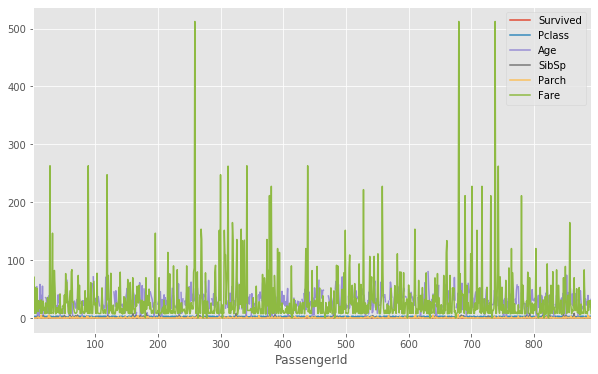

In [100]:
titanic.plot()

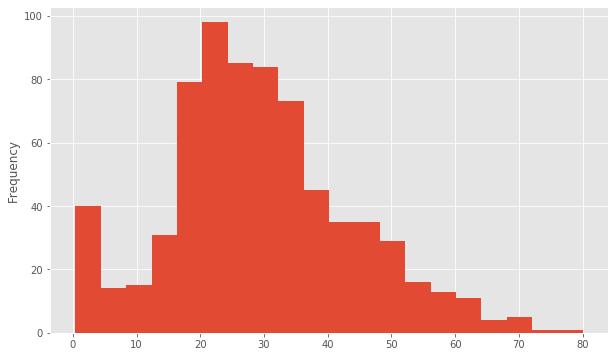

In [101]:
titanic.Age.plot.hist(bins=20)

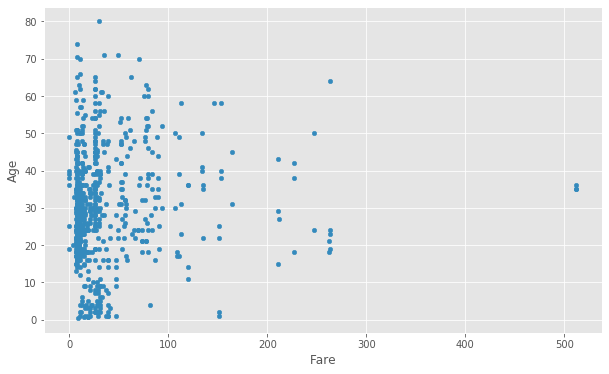

In [102]:
titanic.plot.scatter('Fare', 'Age')

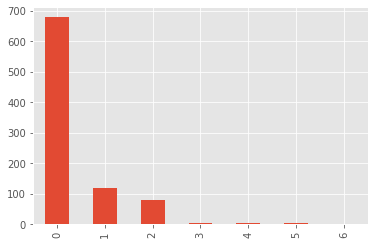

In [49]:
titanic.Parch.value_counts(sort=False).plot.bar()

In [ ]:
seaborn

Объединение таблиц:

`pd.merge()` – продвинутый способ объединения таблиц. Важные параметры:
- `how='inner'` – тип джойна: `'inner'` (пересечение индексов),`'outer'` (объединение индексов), `'left'`/`'right'` (индексы левой/правой таблицы)
- `left_on='col_name'` или `left_index=True` – поле (или индекс) для джойна левой таблицы
- `right_on='col_name` или `right_index=True` – поле (или индекс) для джойна правой таблицы

In [103]:
titanic = pd.read_csv('src/titanic.csv', index_col='PassengerId')
titanic_1 = pd.read_csv('src/titanic.csv', index_col='PassengerId')

In [104]:
titanic = titanic[['Name', 'Age']]
titanic['some_column'] = titanic['Name'].apply(lambda x: len(x))

In [107]:
titanic_1

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [108]:
titanic = pd.merge(titanic, titanic_1, how='inner', on='PassengerId', right_index=True)

In [68]:
titanic

,Name_x,Age_x,some_column,Survived,Pclass,Name_y,Sex,Age_y,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,,,
1,"Braund, Mr. Owen Harris",22.0,23,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,51,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,"Heikkinen, Miss. Laina",26.0,22,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,44,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,"Allen, Mr. William Henry",35.0,24,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,"Montvila, Rev. Juozas",27.0,21,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,"Graham, Miss. Margaret Edith",19.0,28,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,40,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [ ]:
concat